In [1]:
using Plots, DataFrames

In [2]:
function generate_state((N,M))
    A = ones(N,M)
    A = A .- (A .* (2*rand(0:1, N, M)))
    return A
end

function nearest_neighbor_energy(Lattice_Size, state, J)
    energy = 0
    for Lx = 0:Lattice_Size[1]-1
        for Ly = 0:Lattice_Size[2]-1
            coord = [Lx,Ly]
            n = [[-1 0], [1 0], [0 -1], [0 1]]
            for i = 1:length(n)
                nx = n[i][0+1] + coord[0+1]
                ny = n[i][1+1] + coord[1+1]
                nx = mod(nx,Lattice_Size[1])
                ny = mod(ny,Lattice_Size[2])
                energy += state[nx+1,ny+1] * state[Lx+1, Ly+1]
            end
        end
    end
    return J*energy
end

function cross_entropy(p1, p2)
    N = size(p1)[1]
    s = rand(2:N-1)
    c1 = copy.(p1) .* 0
    c2 = copy.(c1)
    c1[1:s,:] = p1[1:s,:]
    c1[s:N,:] = p2[s:N,:]
    c2[1:s,:] = p2[1:s,:]
    c2[s:N,:] = p1[s:N,:]
    return [c1, c2]
end

function mutation(c1, mutation_rate)
    r = rand(size(c1)[1], size(c1)[2])
    mutation_array = (r .<= mutation_rate) .* (-2) .+ 1
    return mutation_array .* c1
end

mutation (generic function with 1 method)

In [3]:

state = generate_state(Lattice_Size)
println(nearest_neighbor_energy(Lattice_Size, state, J))
heatmap(state,nearest_neighbor_energy(Lattice_Size, state, J))

LoadError: UndefVarError: `Lattice_Size` not defined

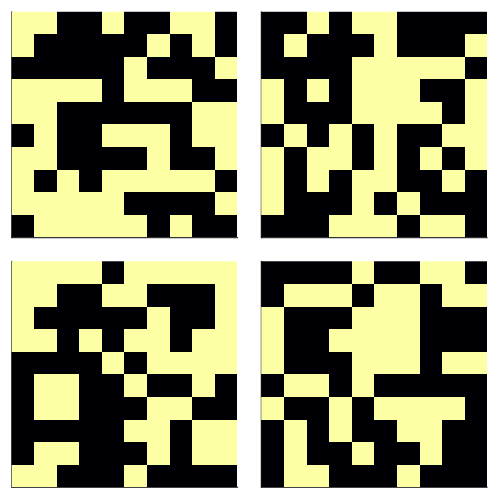

In [37]:
Lattice_Size = (10, 10)
mutation_rate = 0.01
N = 1000
N_children = 100
N_Iterations = 1000
J = 1
population = []
energy = []
for i = 1:N
    state = generate_state(Lattice_Size)
    push!(population, state)
    push!(energy, nearest_neighbor_energy(Lattice_Size, state, J))
end
popdf = DataFrame(Energy = energy, State = population)
global popdf
anim = @animate for i = 1:N_Iterations
    global popdf
    idx1 = rand(1:length(population))
    idx2 = rand(1:length(population))
    while idx1 == idx2
        idx2 = rand(1:length(population))
    end
    for k = 1:N_children
        idx1 = rand(1:length(population))
        idx2 = rand(1:length(population))
        while idx1 == idx2
            idx2 = rand(1:length(population))
        end
        p1 = popdf.State[idx1]
        p2 = popdf.State[idx2]
        c1, c2 = cross_entropy(p1, p2)
        c1 = mutation(c1, mutation_rate)
        c2 = mutation(c2, mutation_rate)
        append!(popdf, DataFrame(Energy = [nearest_neighbor_energy(Lattice_Size, c1, J)], State = [c1]))
        append!(popdf, DataFrame(Energy = [nearest_neighbor_energy(Lattice_Size, c2, J)], State = [c2]))
    end
    popdf = sort(popdf, :Energy)
    popdf = popdf[1:N, :]
    #println(popdf)
    #println(popdf[1,:])
    plot(
        heatmap(popdf.State[1], xticks = false, cbar = false, yticks = false, title = string("Energy: ",popdf.Energy[1])),
        heatmap(popdf.State[2], xticks = false, cbar = false, yticks = false, title = string("Energy: ",popdf.Energy[2])),
        heatmap(popdf.State[3], xticks = false, cbar = false, yticks = false, title = string("Energy: ",popdf.Energy[3])),
        heatmap(popdf.State[4], xticks = false, cbar = false, yticks = false, title = string("Energy: ",popdf.Energy[4])))
end
gif(anim,"evolution.gif")

LoadError: MethodError: no method matching gif(::String, ::Animation)

[0mClosest candidates are:
[0m  gif([91m::Animation[39m, ::Any; kw...)
[0m[90m   @[39m [36mPlots[39m [90m~/.julia/packages/Plots/sxUvK/src/[39m[90m[4manimation.jl:91[24m[39m


In [ ]:
gif(anim,"evolution.gif")